In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/data.zip

Archive:  /content/drive/MyDrive/data.zip
  inflating: data-2/data.yaml        
  inflating: data-2/test/images/acne-102_jpeg.rf.d15b34dc9a1e69aa996118a4c1a173ef.jpg  
  inflating: data-2/test/images/acne-105_jpeg.rf.e9b2ecfb4afb0217f046179f125242d2.jpg  
  inflating: data-2/test/images/acne-112_jpeg.rf.a03c796422719e964f46be1c118861bc.jpg  
  inflating: data-2/test/images/acne-128_jpg.rf.e3826584d02398d0f1d915cf3365a959.jpg  
  inflating: data-2/test/images/acne-140_jpg.rf.785b2c29676c422c6a1cdbe6708f86e8.jpg  
  inflating: data-2/test/images/acne-144_jpg.rf.e7404e17167235e55bc46e5c3914e22f.jpg  
  inflating: data-2/test/images/acne-151_jpg.rf.638c693eb9342b4800bd8b1758e566e1.jpg  
  inflating: data-2/test/images/acne-155_jpg.rf.96681853cd48ff20eb8c2f0e3f32bdbf.jpg  
  inflating: data-2/test/images/acne-158_jpg.rf.9c07578d00524a159f65bff978a79c5a.jpg  
  inflating: data-2/test/images/acne-15_jpeg.rf.510f6ab6153777e8087f1439ef39d8cc.jpg  
  inflating: data-2/test/images/acne-160_jpg.rf

In [3]:
!nvidia-smi

Sat Feb 24 19:29:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 10.1 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [7]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/data-2/data.yaml epochs=200 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 232MB/s]
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

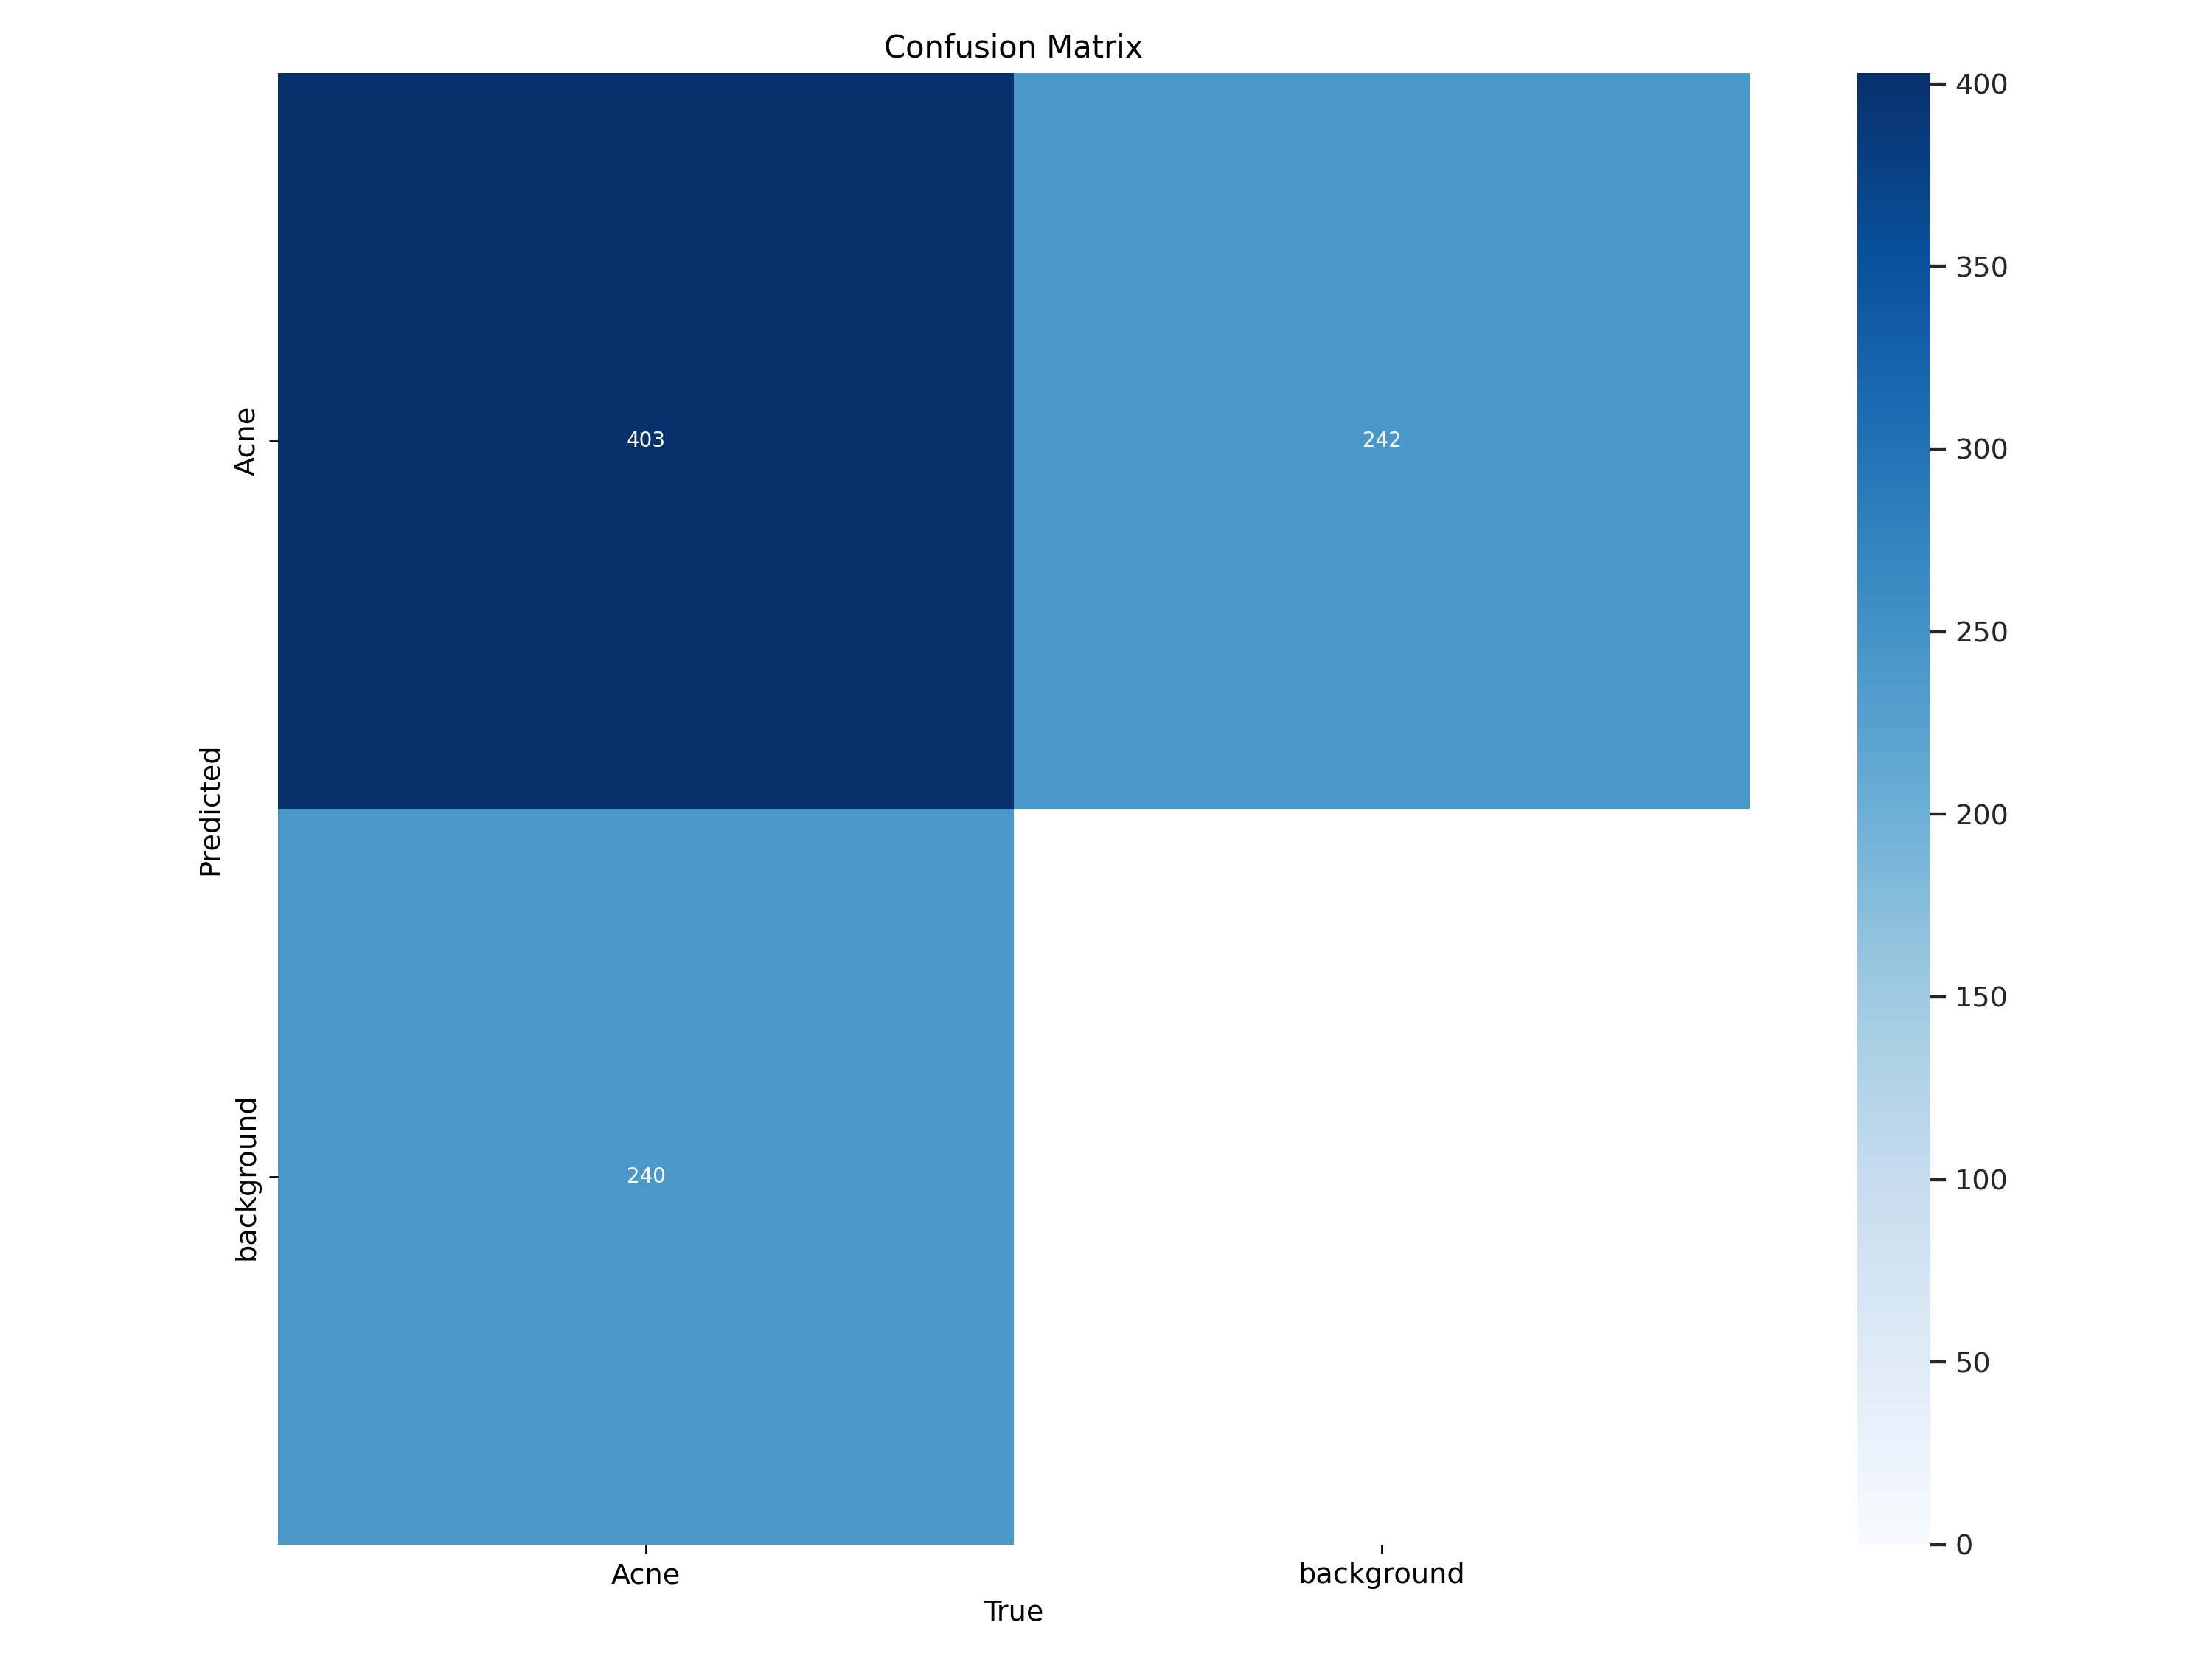

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

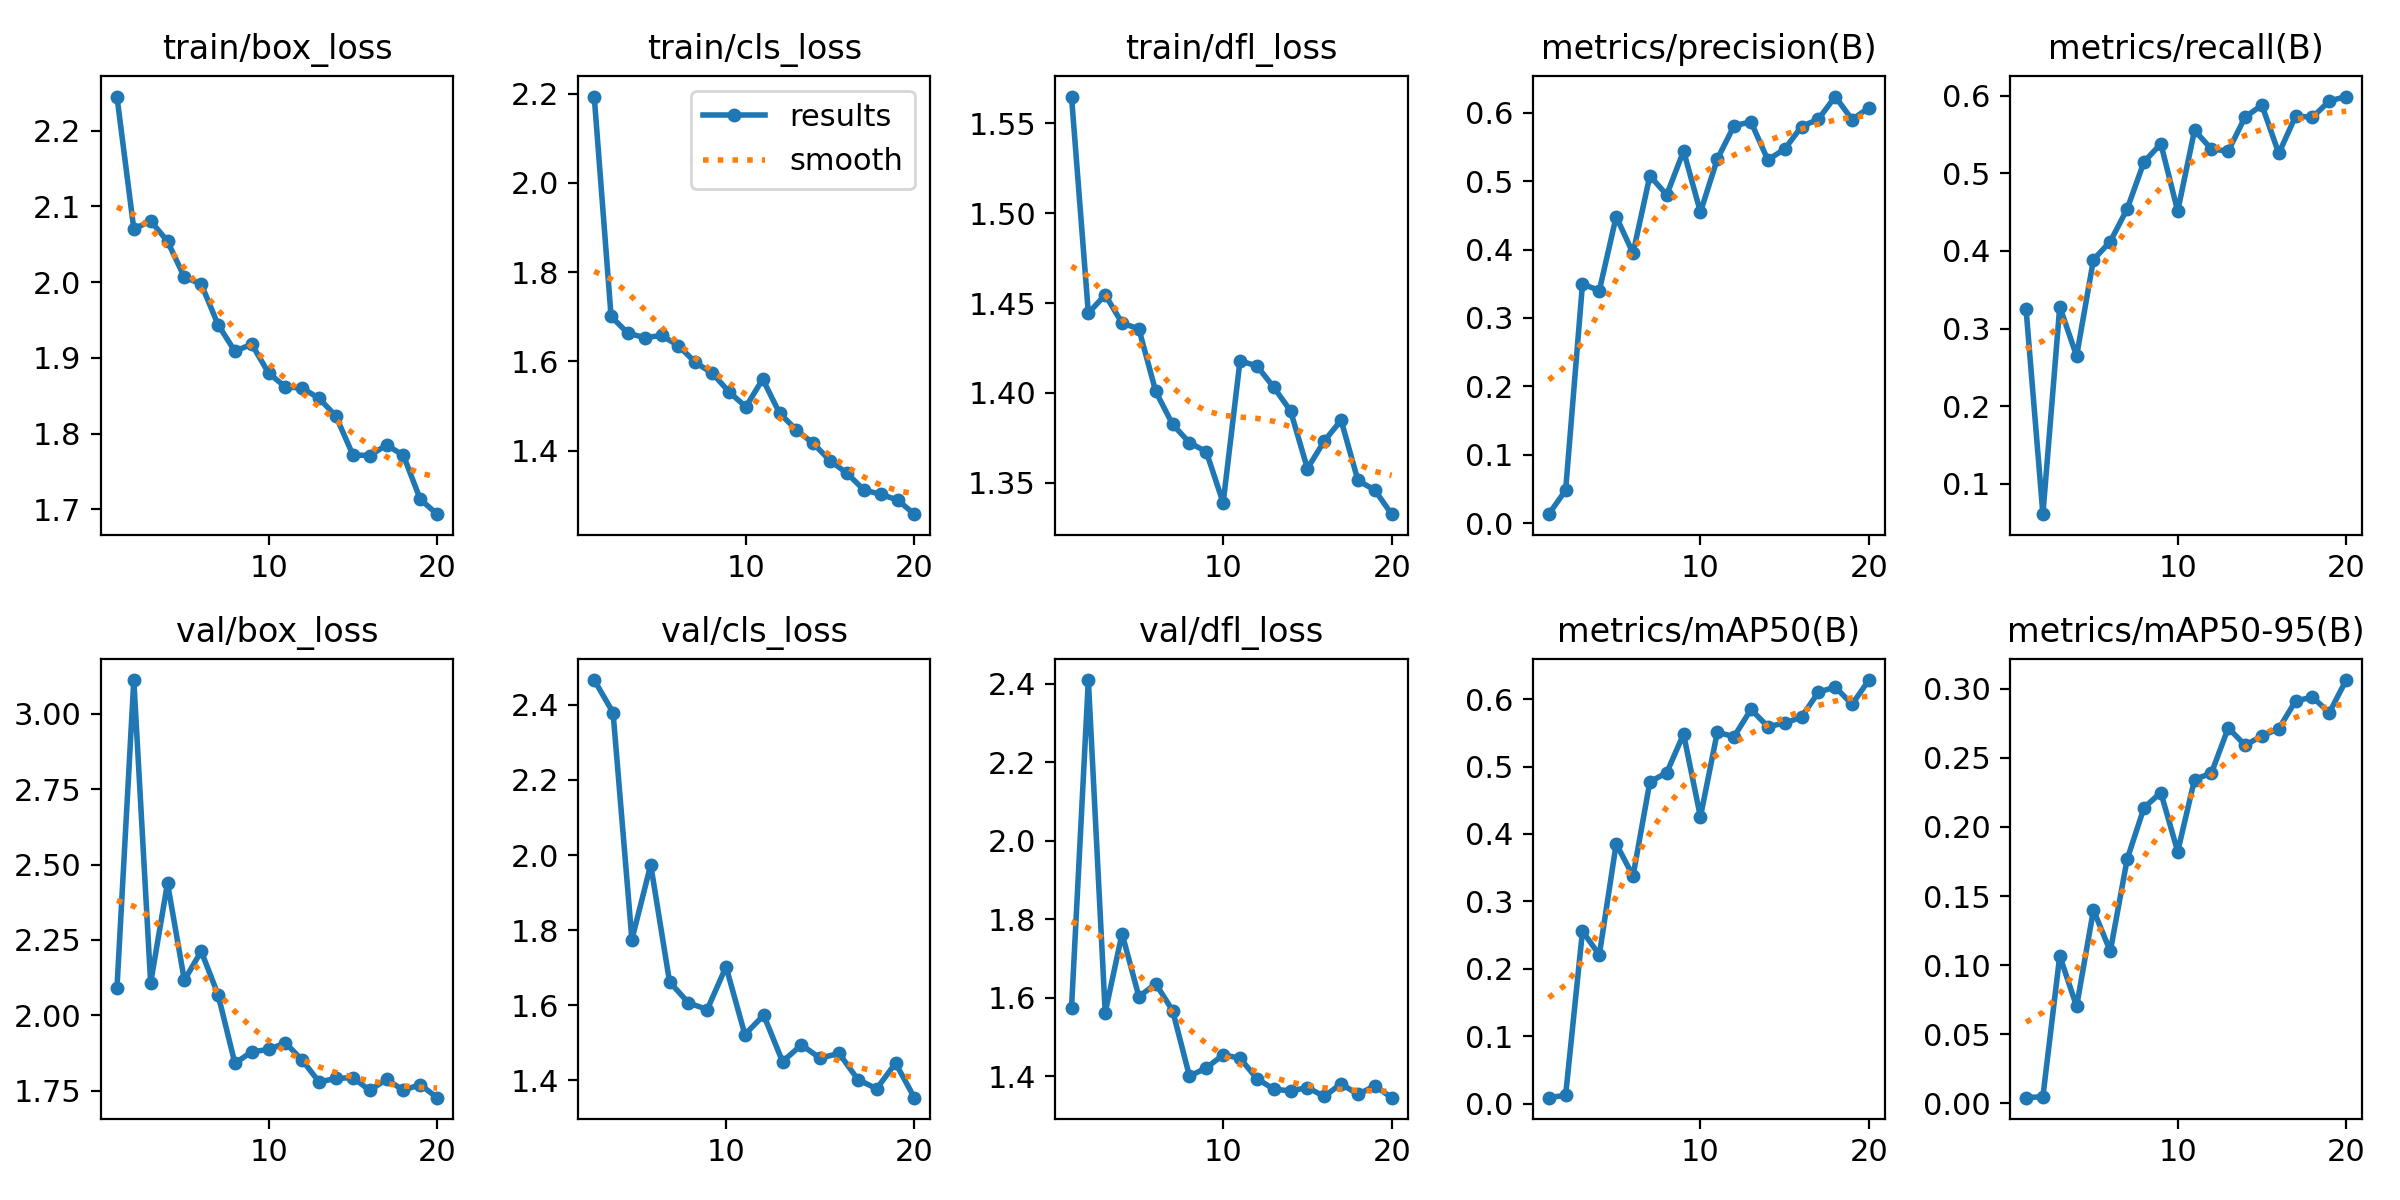

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/data-2/data.yaml

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/data-2/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:10<00:00,  2.58s/it]
                   all         56        643      0.607      0.596      0.629      0.305
Speed: 11.5ms preprocess, 27.8ms inference, 0.0ms loss, 28.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source=/content/data-2/valid/images

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/56 /content/data-2/valid/images/acne-103_jpeg.rf.055236d16a0ad3642b8e9f44250a8999.jpg: 640x640 6 Acnes, 37.0ms
image 2/56 /content/data-2/valid/images/acne-113_jpeg.rf.61f34253768c2c2d90f282009cc85cc1.jpg: 640x640 4 Acnes, 37.1ms
image 3/56 /content/data-2/valid/images/acne-115_jpeg.rf.1c4b3100bd61c3be8b101094633f80e0.jpg: 640x640 5 Acnes, 37.0ms
image 4/56 /content/data-2/valid/images/acne-11_jpeg.rf.7371382ec505972eb878bf9f4765b068.jpg: 640x640 4 Acnes, 36.4ms
image 5/56 /content/data-2/valid/images/acne-121_jpg.rf.fda929f19402573163ffba906f3509ac.jpg: 640x640 11 Acnes, 36.3ms
image 6/56 /content/data-2/valid/images/acne-131_jpg.rf.116f58db510524f94237b01e37f3a16f.jpg: 640x640 5 Acnes, 37.3ms
image 7/56 /content/data-2/valid/images/acne-134_jpg.rf.417c82e7063a6160461440b5758b9993.jpg: 640x640 9 Acnes, 31.6ms
i

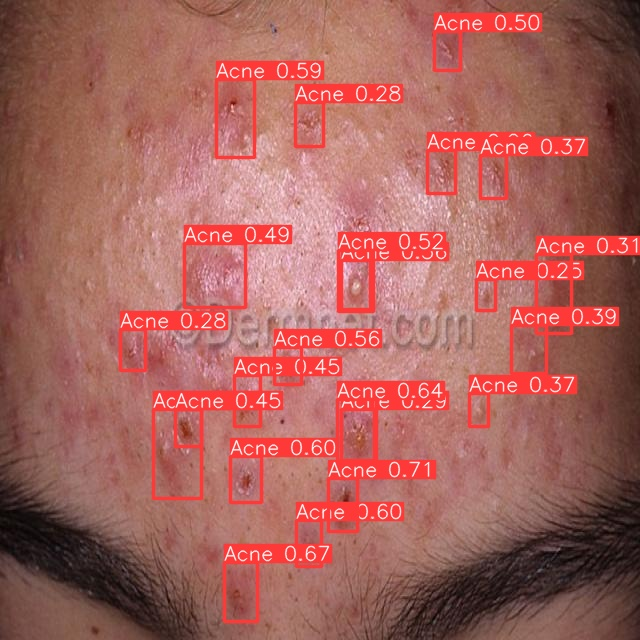

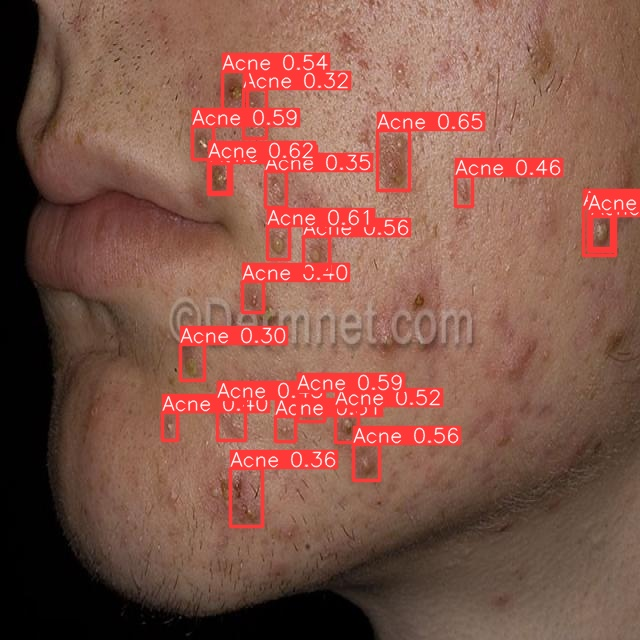

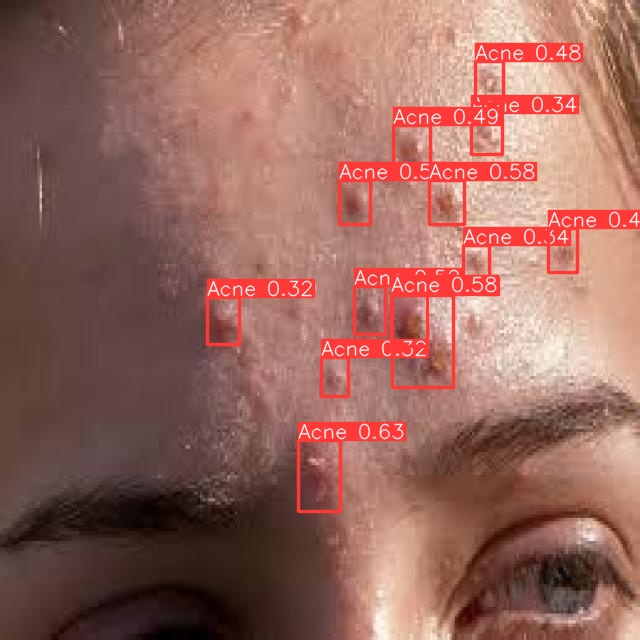

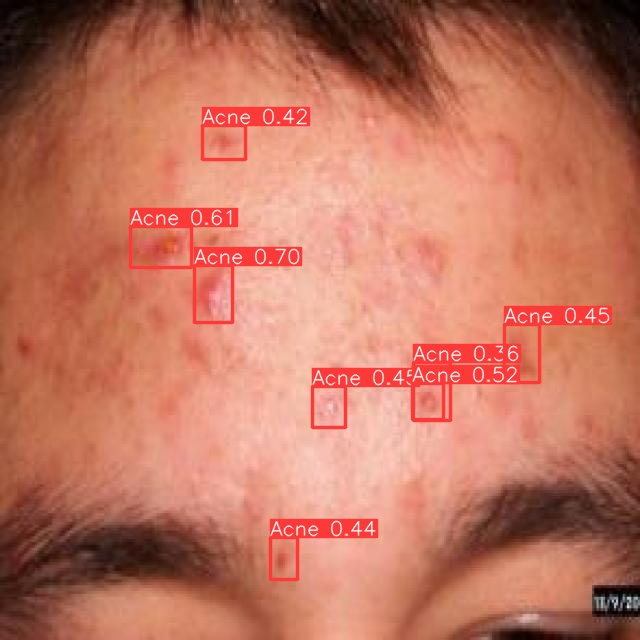

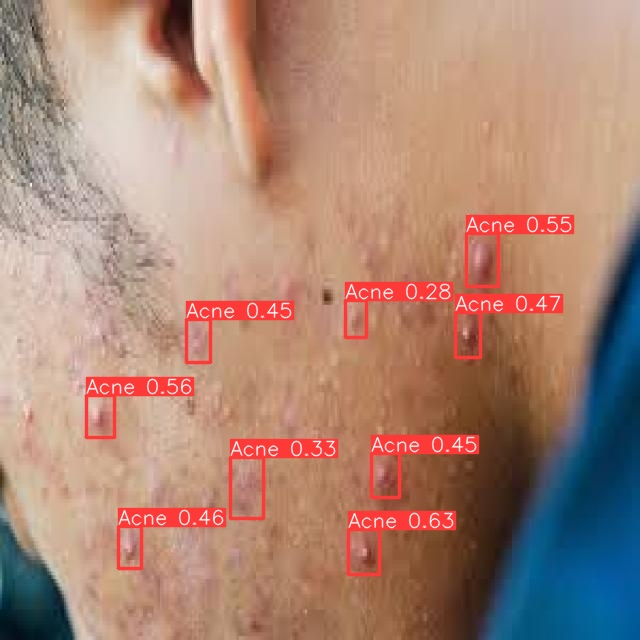

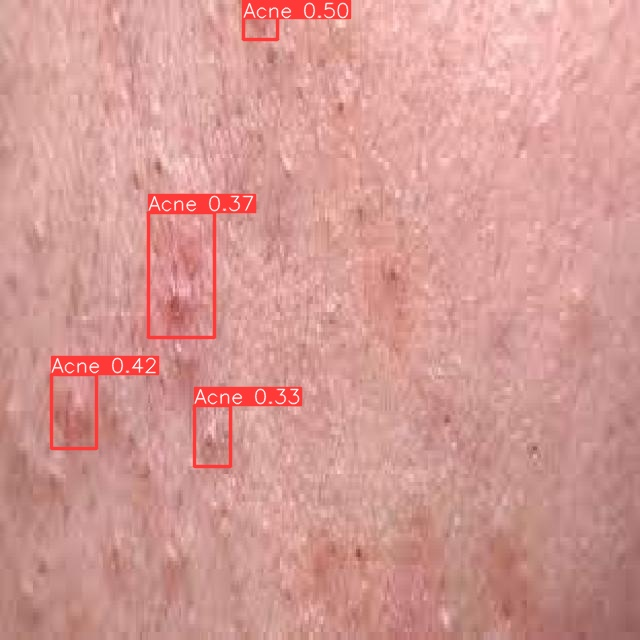

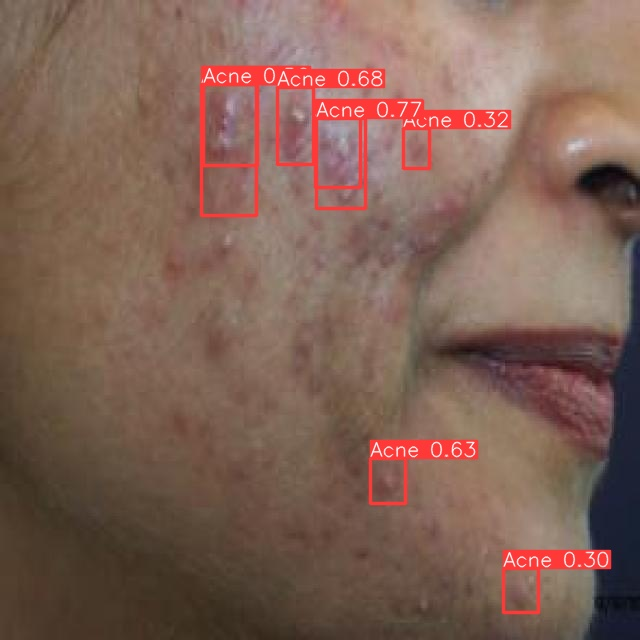

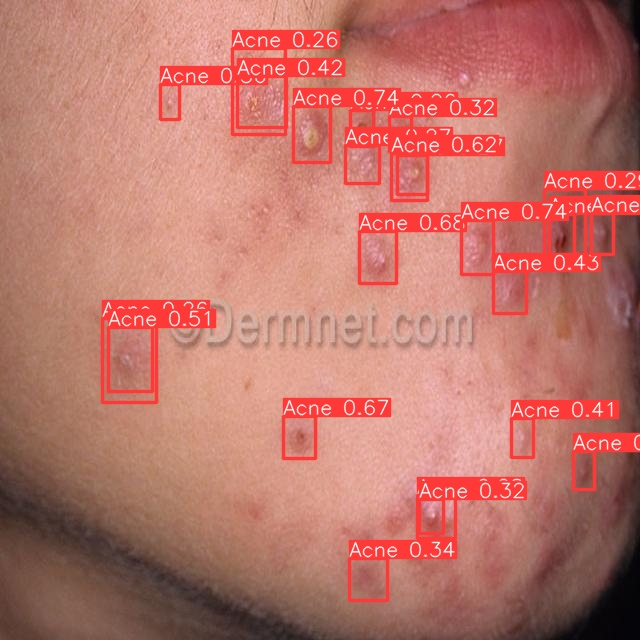

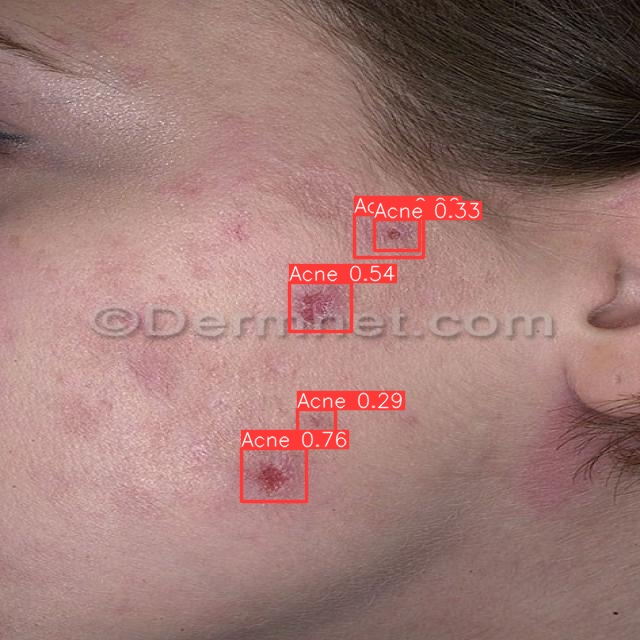

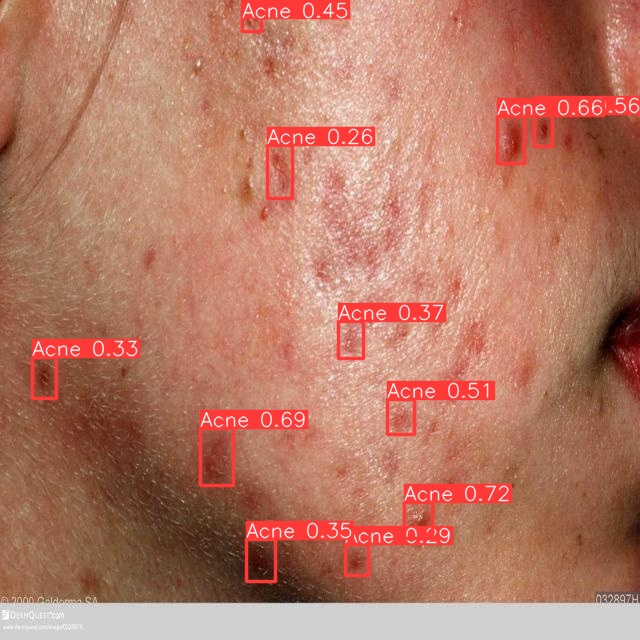

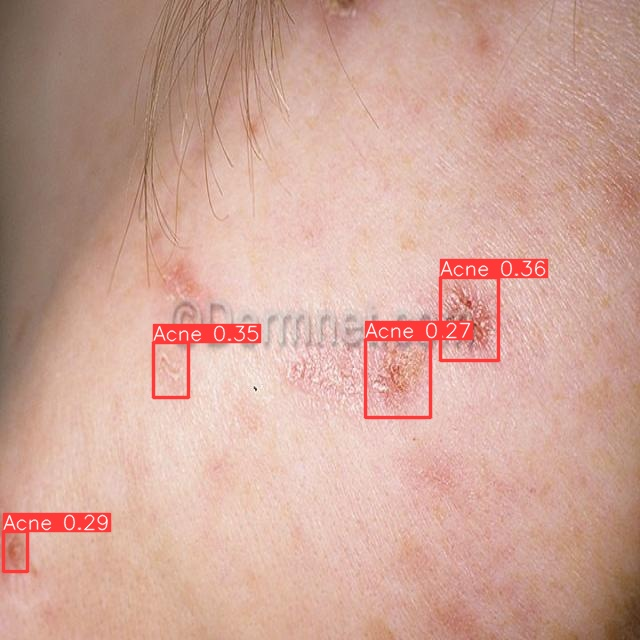

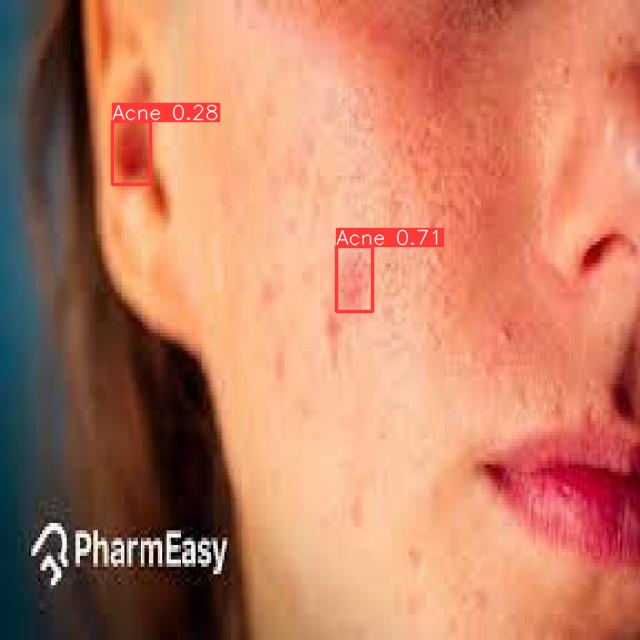

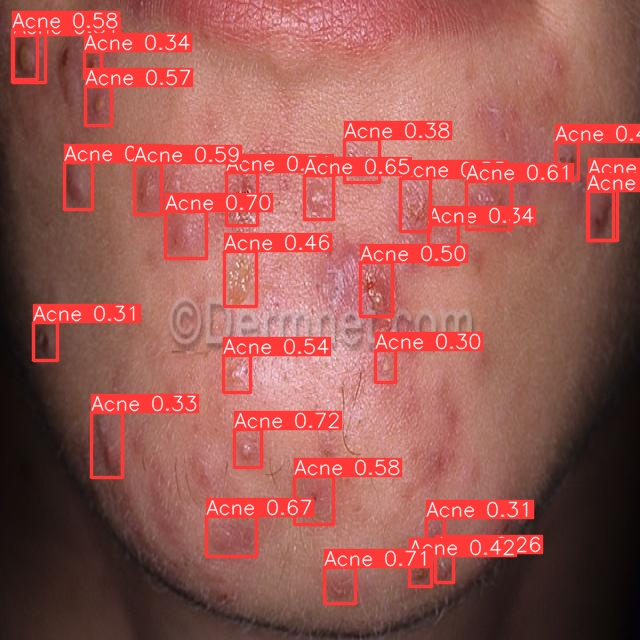

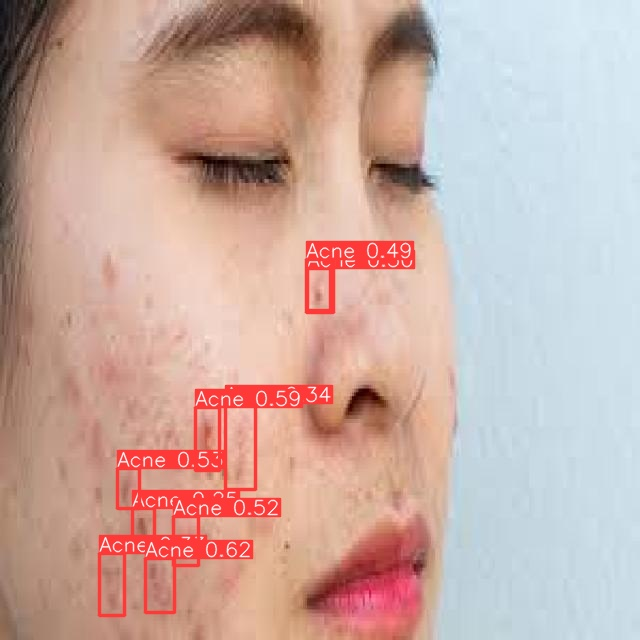

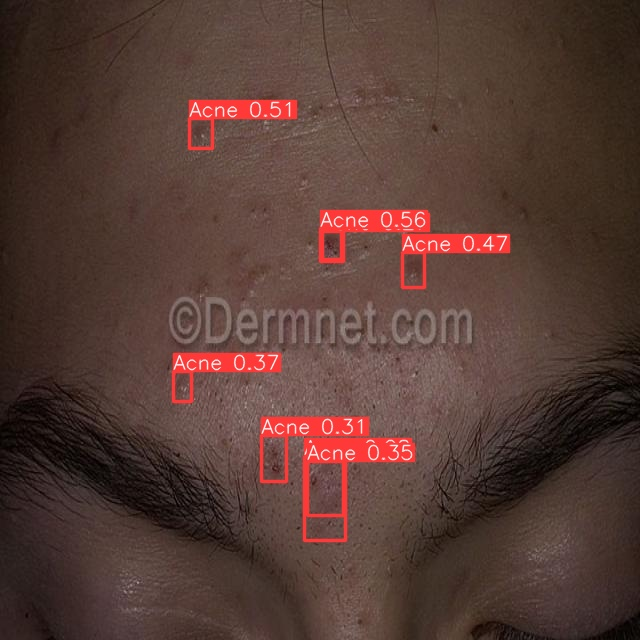

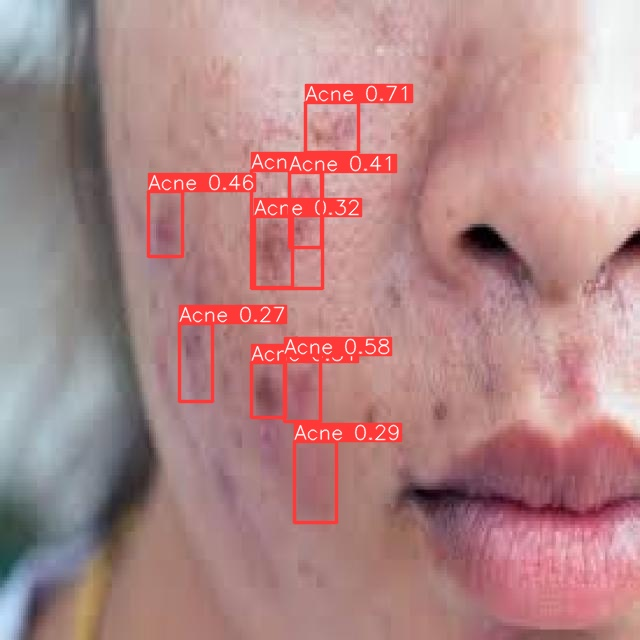

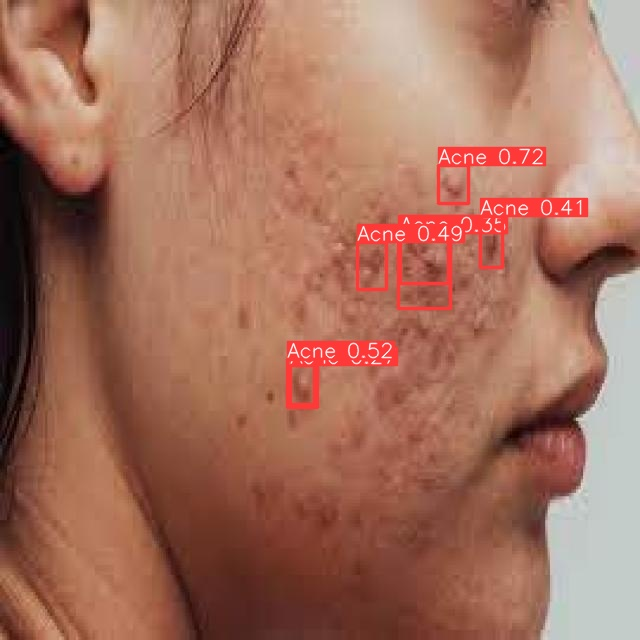

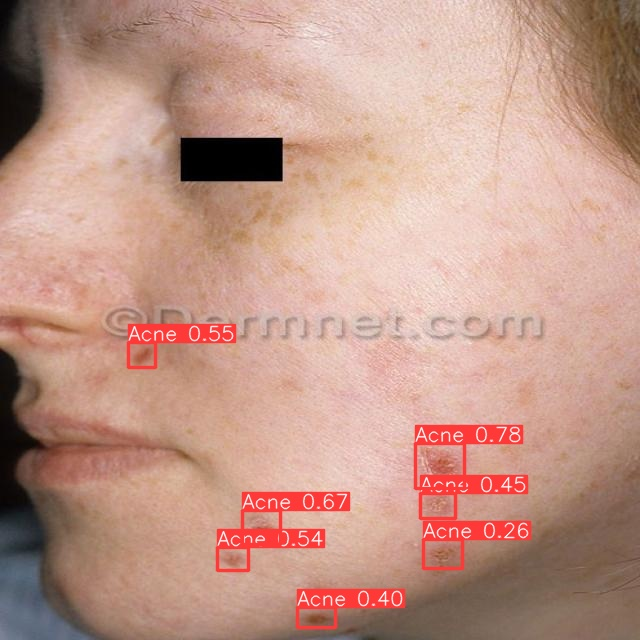

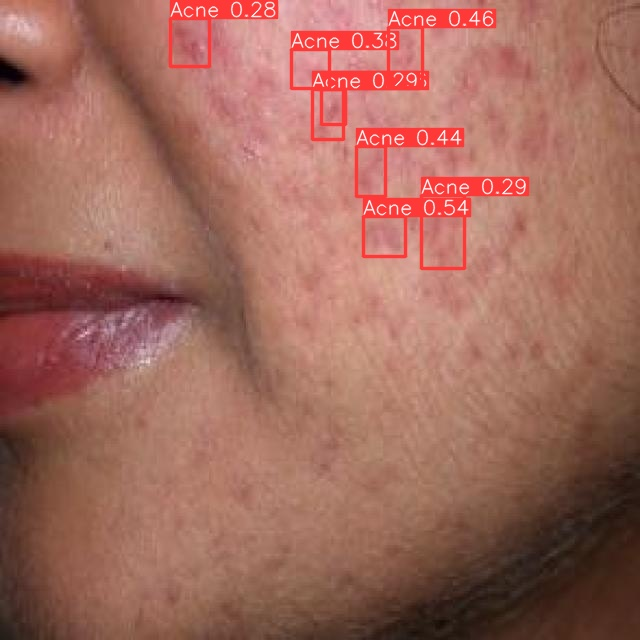

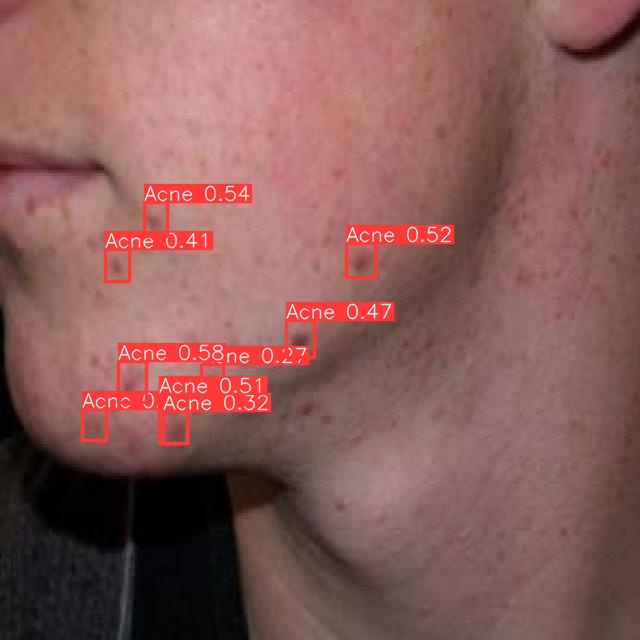

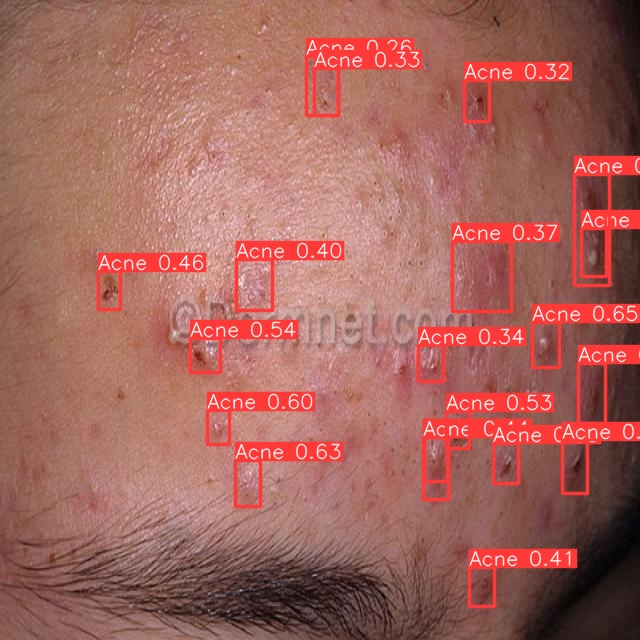

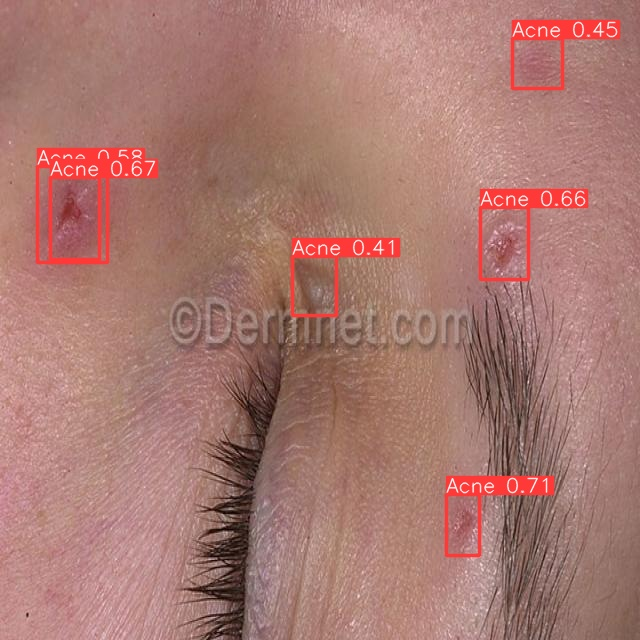

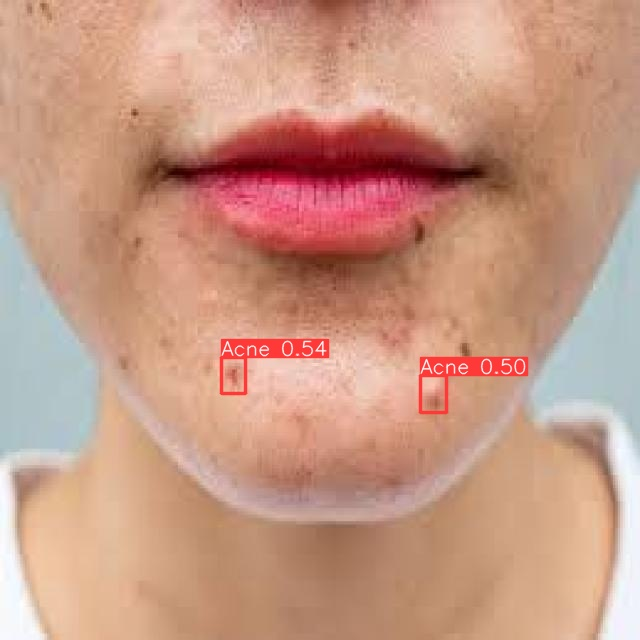

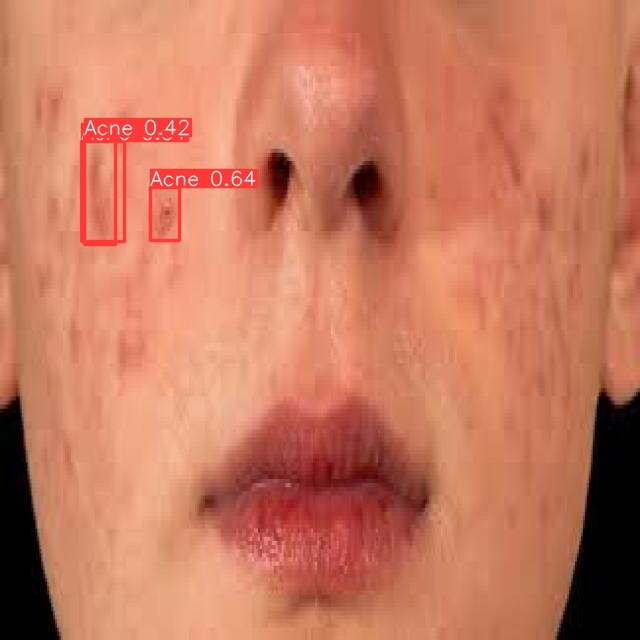

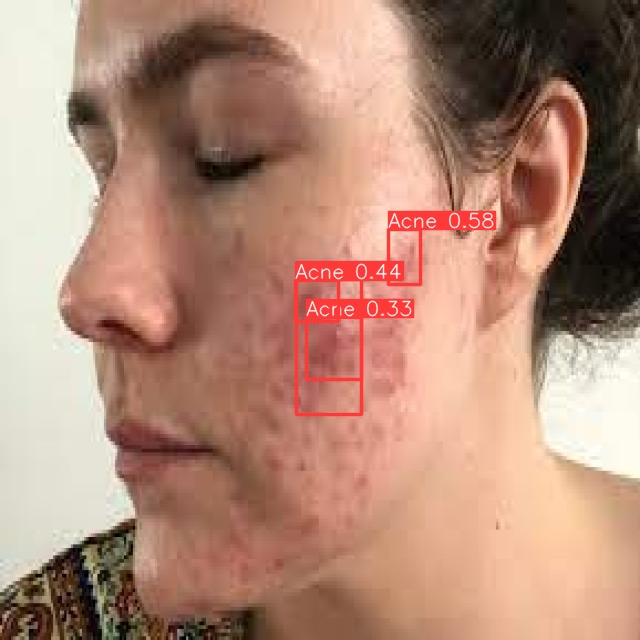

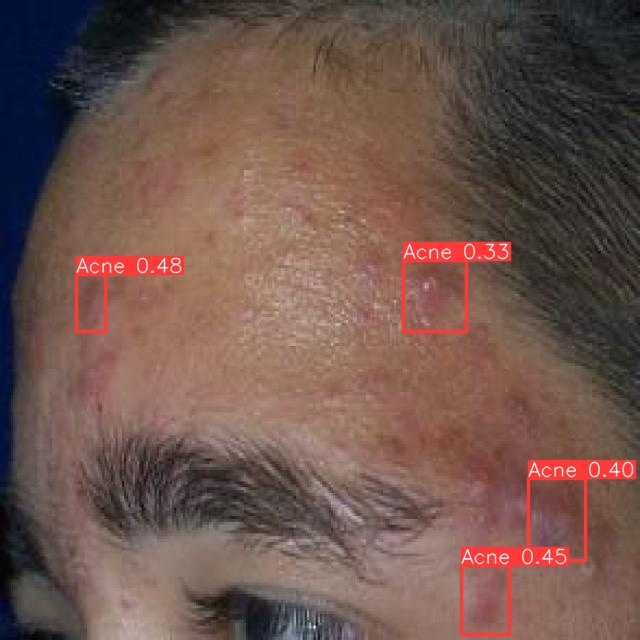

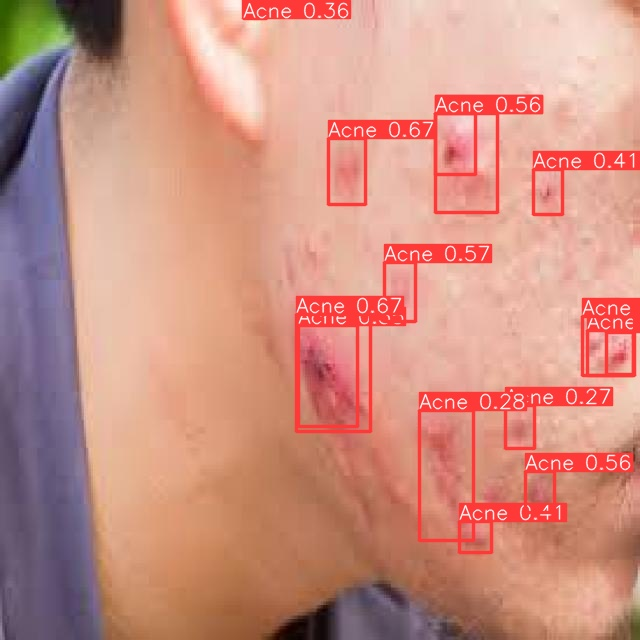

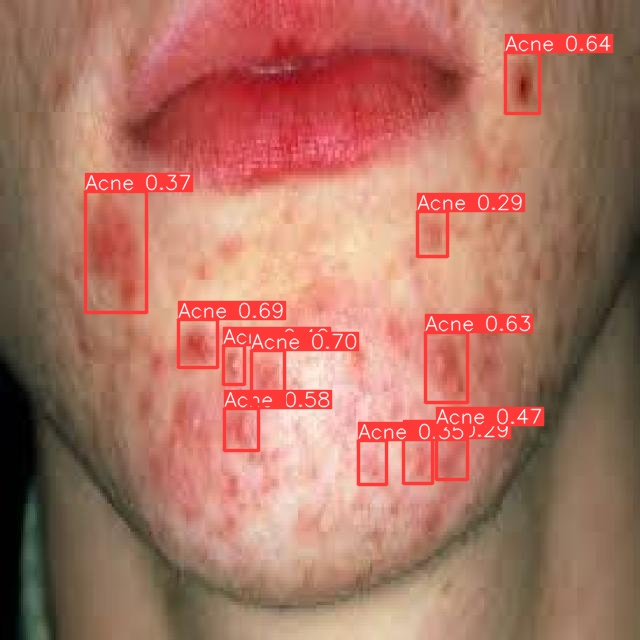

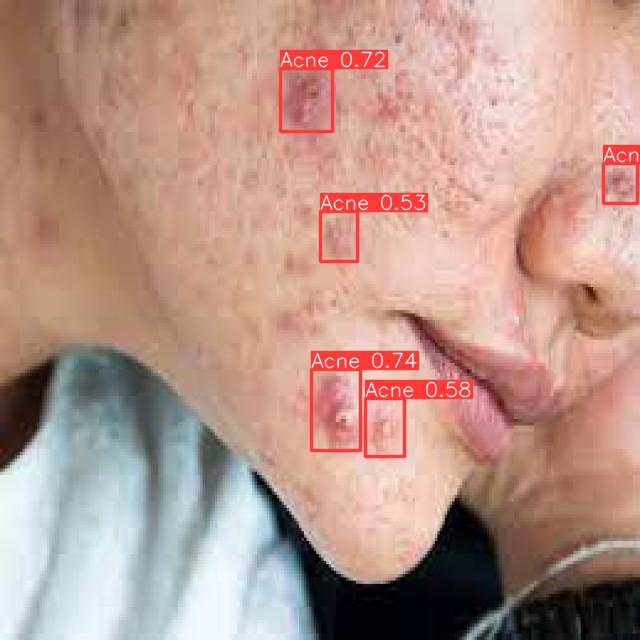

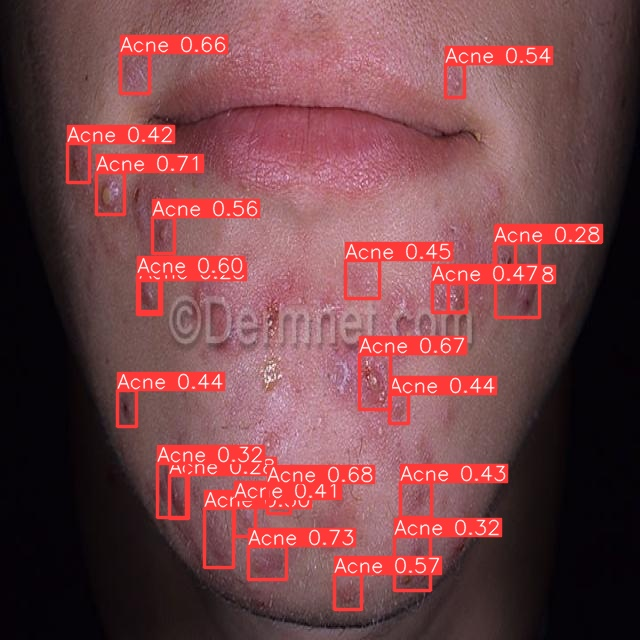

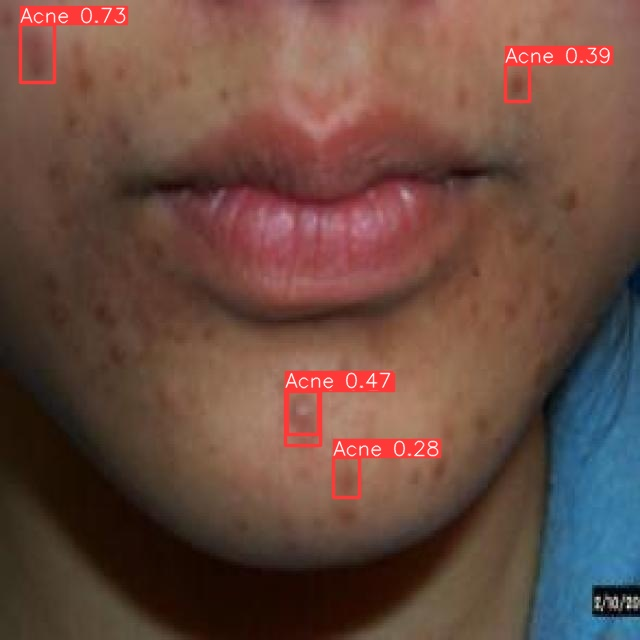

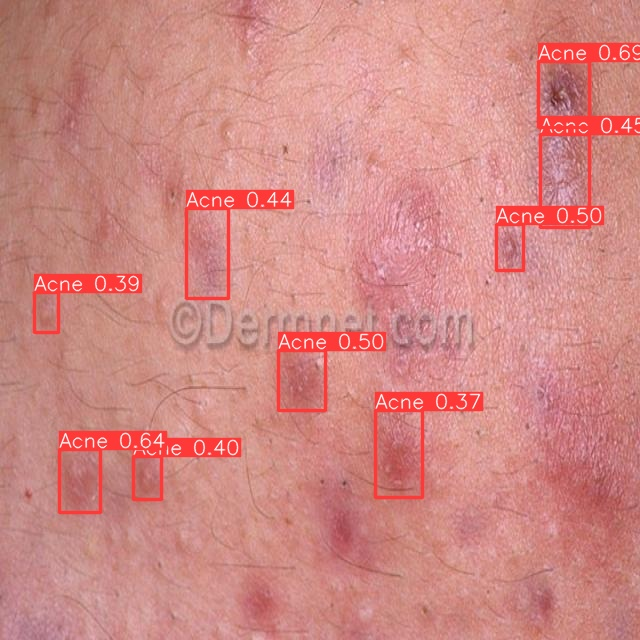

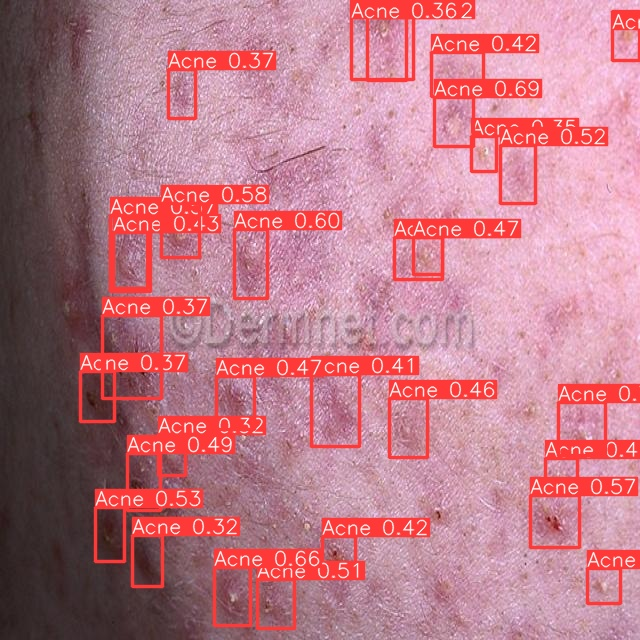

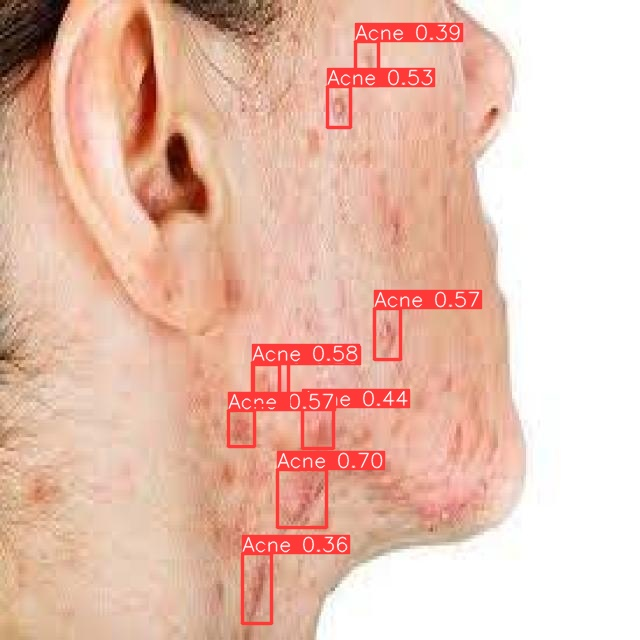

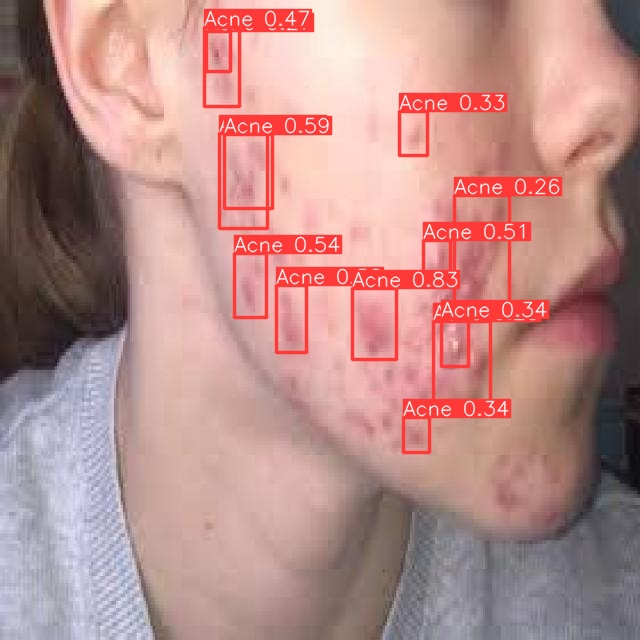

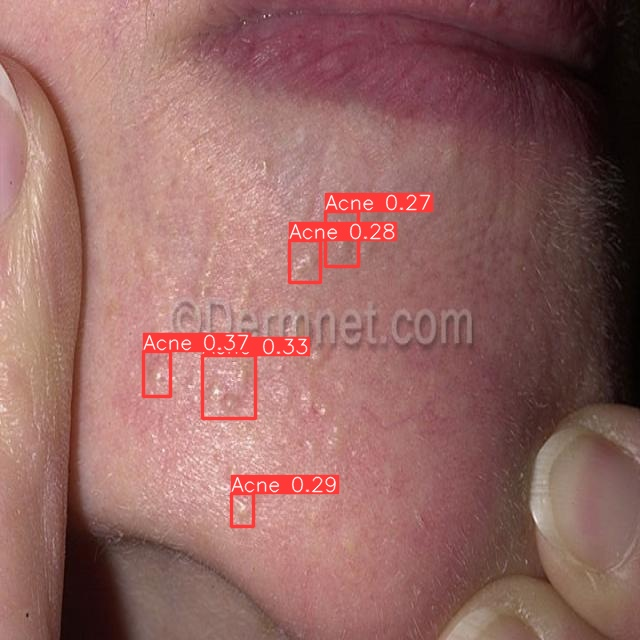

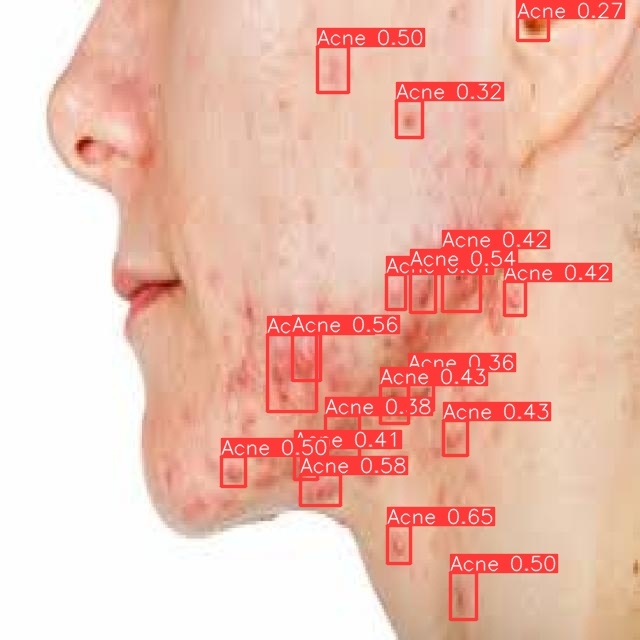

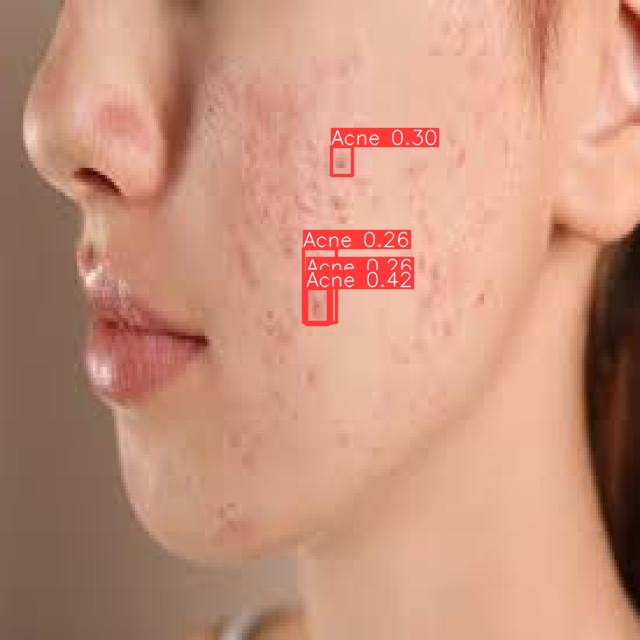

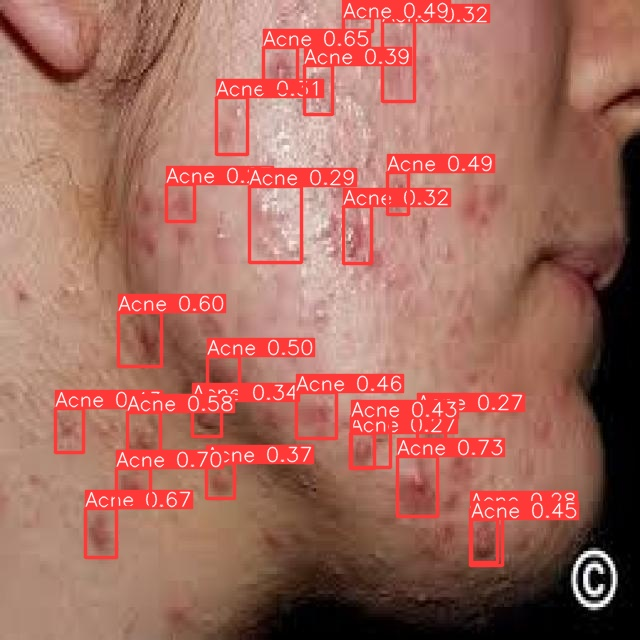

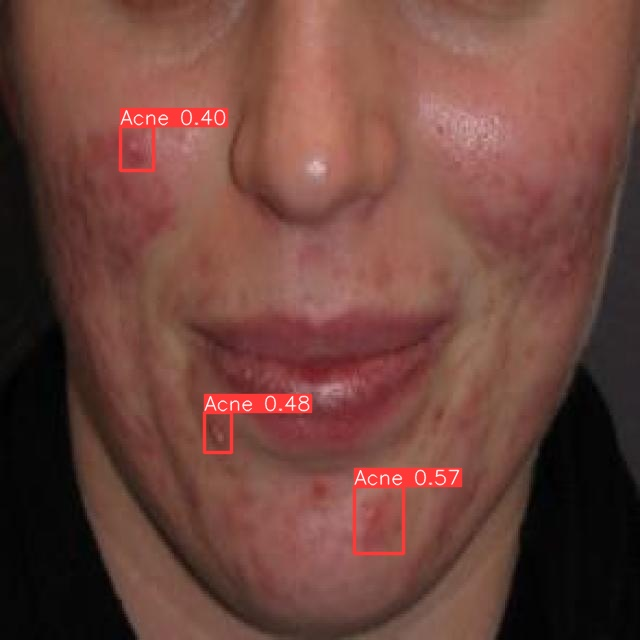

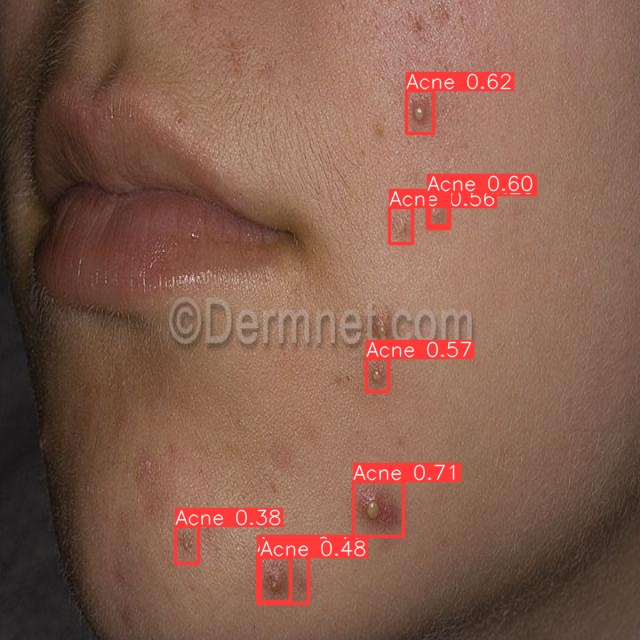

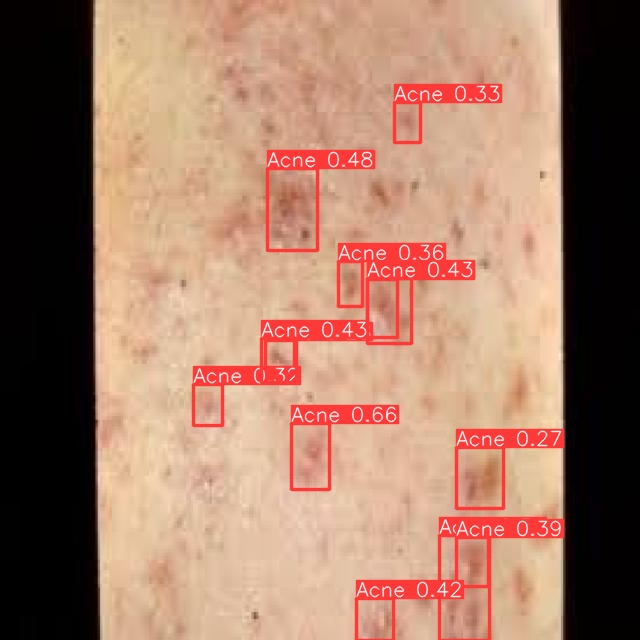

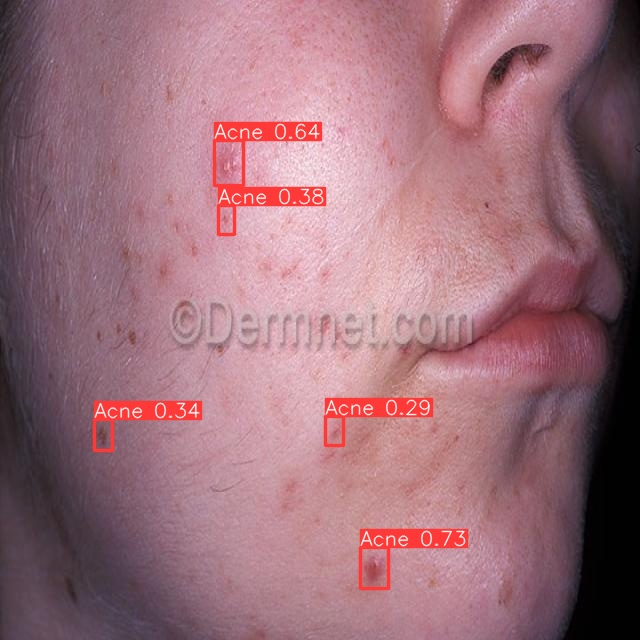

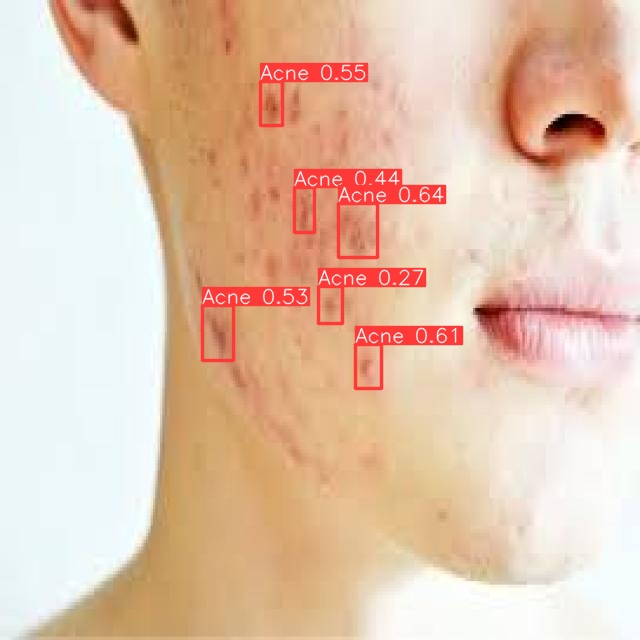

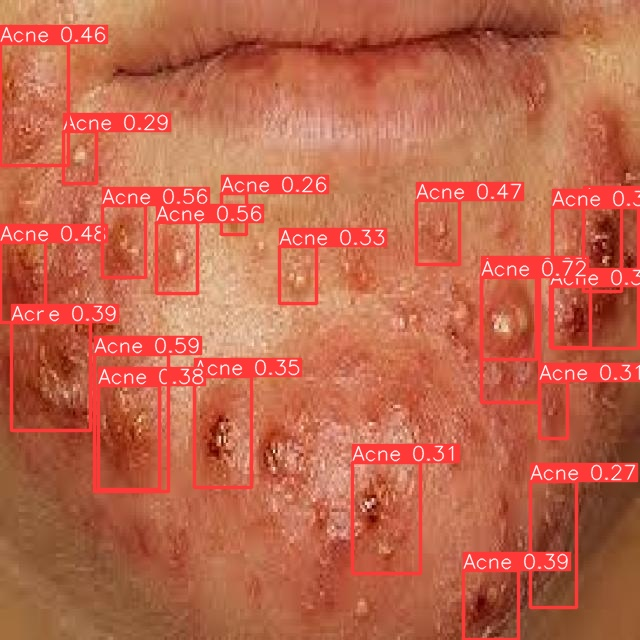

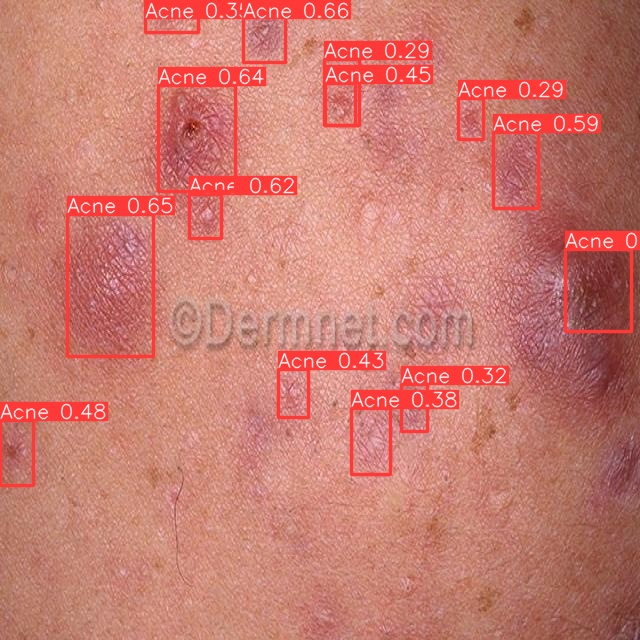

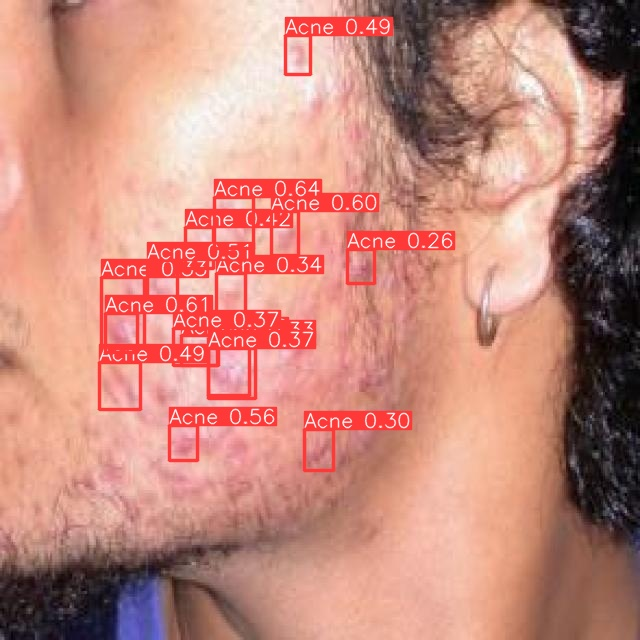

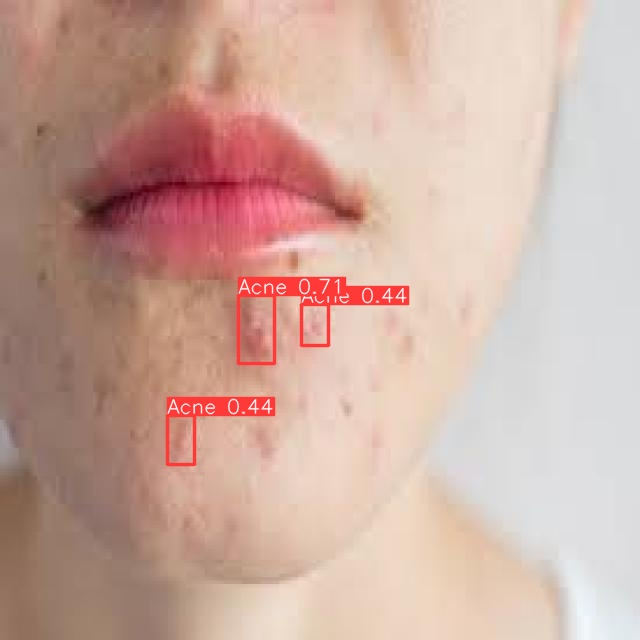

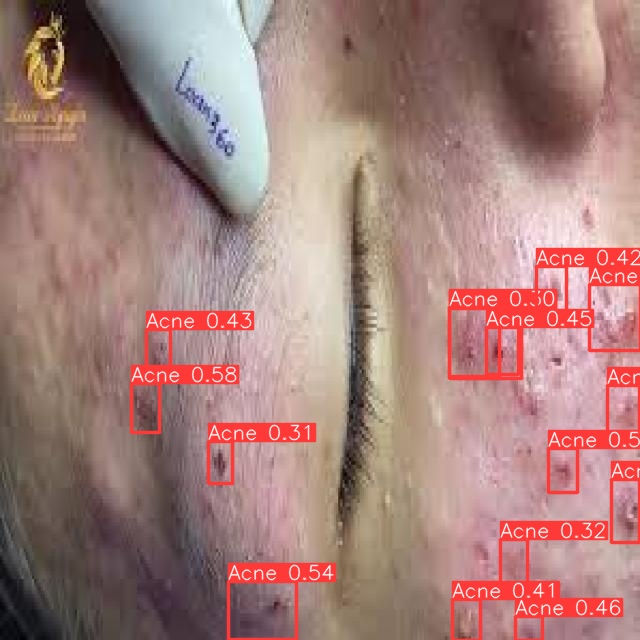

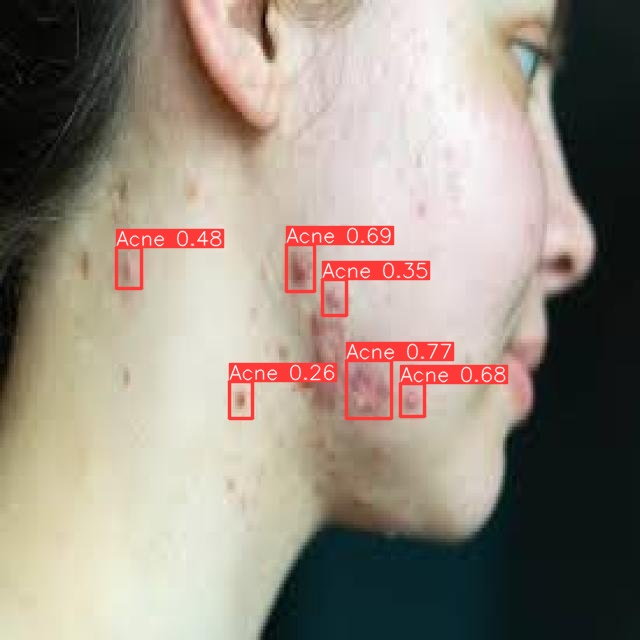

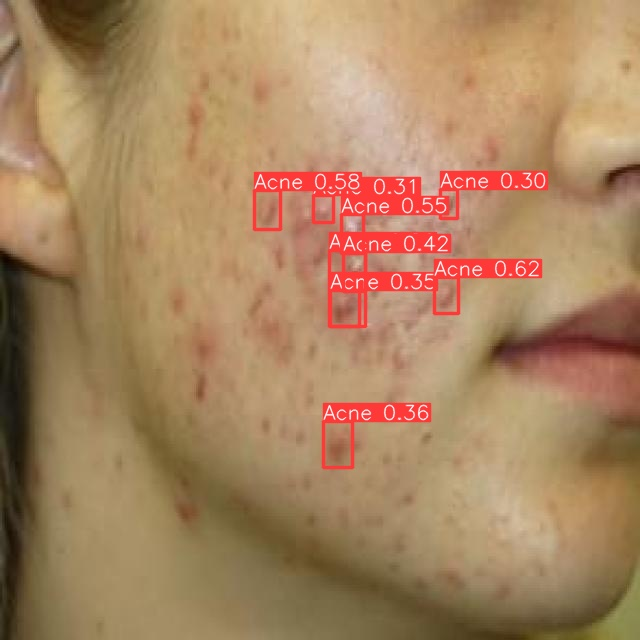

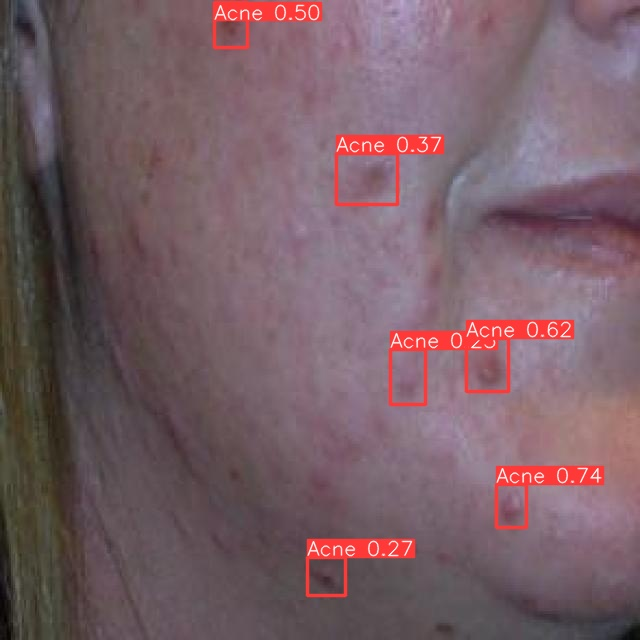

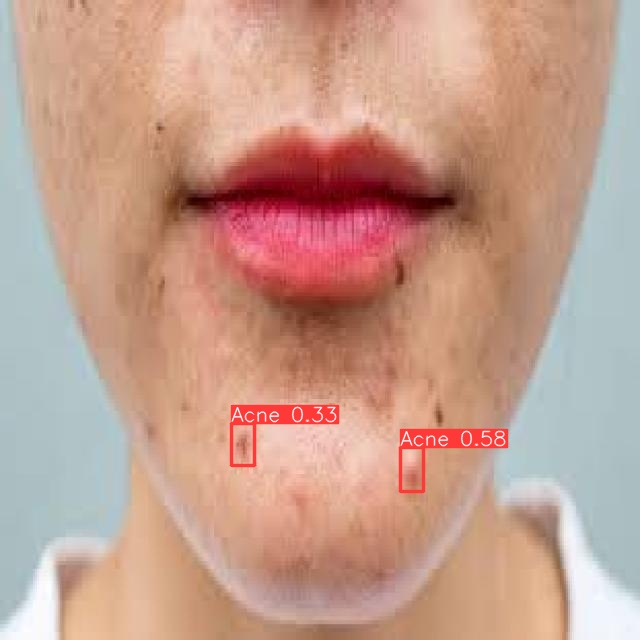

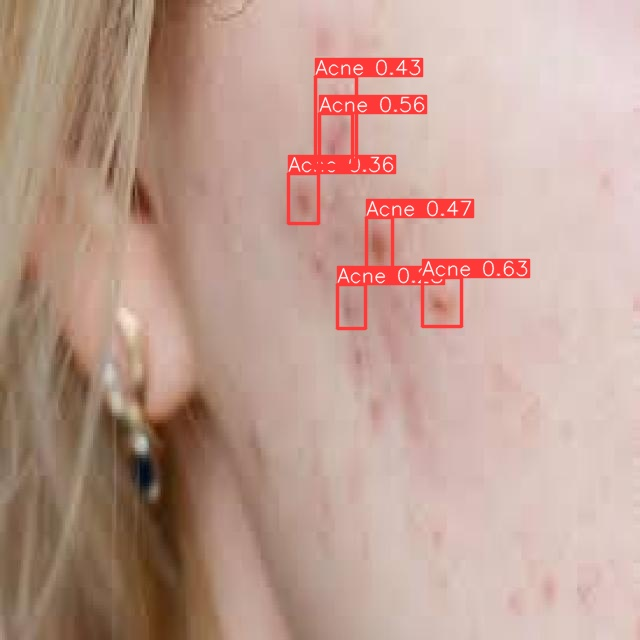

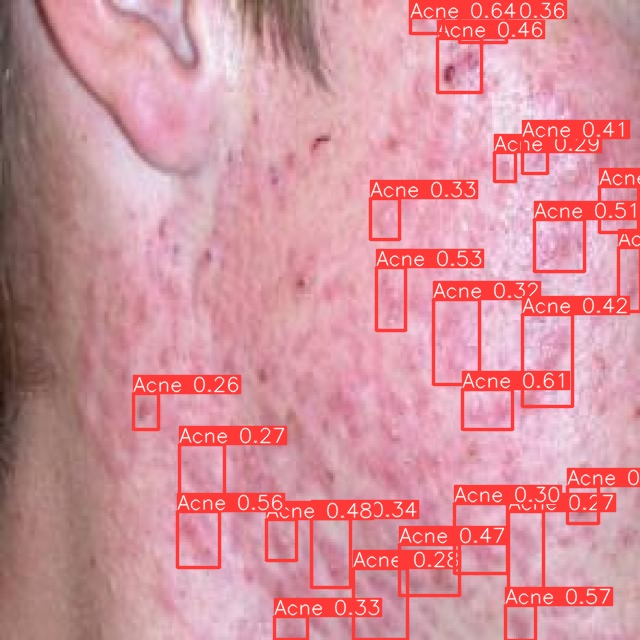

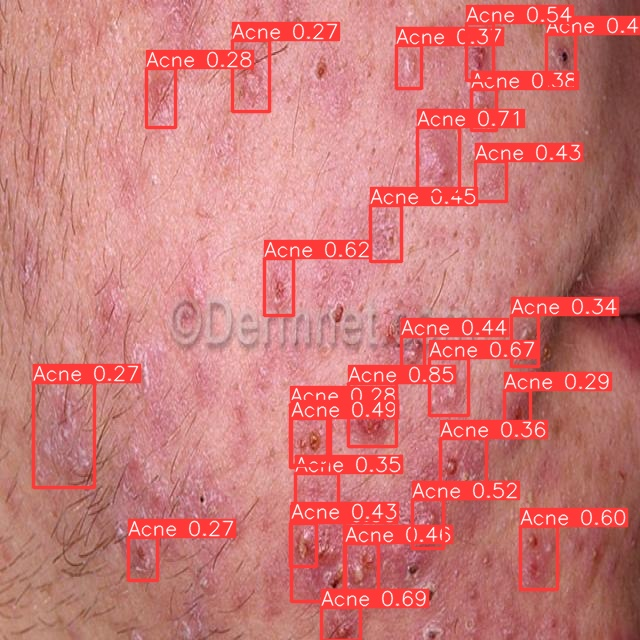

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")